In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from linearmodels.panel import PanelOLS

In [4]:
df = pd.read_excel('/Users/davidsokurov/Desktop/I.S./Data Analysis/Final I.S. Dataset.xlsx')

3 steps

1. Cleaning and organazing 
2. EDA
3. Regression
4. Diagnostics checks 

1. Cleaninga and organazing the data

In [108]:
# Total missing values are 51 (Visitation and Tourism)
missing_values = df.isnull().sum()
print(missing_values)
total_missing_values = df.isnull().sum().sum()

print("Total missing values:", total_missing_values)

Park                    0
Country                 0
Year                    0
Visitation             13
AnimationPopularity     0
GDP                     0
Population              0
Tourism                38
dtype: int64
Total missing values: 51


In [ ]:
# Get the list of variables 
variable_list = df.columns.tolist()
print("List of variables:", variable_list)

In [ ]:
unique_parks = df['Park'].unique()
unique_park_count = df['Park'].nunique()
print(unique_park_count)
print(unique_parks)

In [ ]:
# GIves the list of all missing values and their locations 
missing_values_df = df.isnull()

missing_locations = pd.DataFrame([(row, col) for row in missing_values_df.index for col in missing_values_df.columns if missing_values_df.at[row, col]])
print("Locations of missing values:")
print(missing_locations)

In [6]:
# Imputes the variables Visitation and Tourism
df['Visitation'] = df.groupby('Park')['Visitation'].transform(lambda x: x.fillna(x.mean()))
df['Tourism'] = df.groupby('Park')['Tourism'].transform(lambda x: x.fillna(x.mean()))


AttributeError: 'DataFrame' object has no attribute 'save'

In [11]:
df.to_csv("final_data.csv", index=False)

In [ ]:
#df.to_excel("edited_dataset.xlsx")
unique_countries = df["Country"].unique()
print(unique_countries)

2. Exploratory Data Analysis 

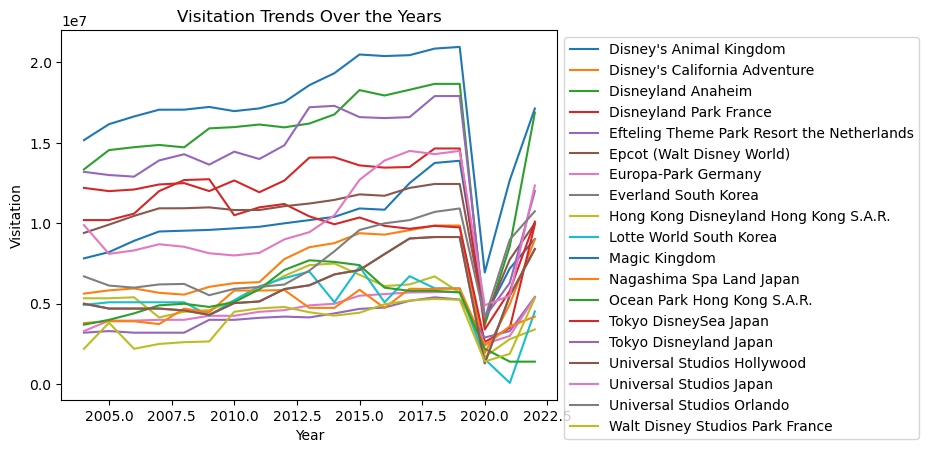

<Figure size 1500x600 with 0 Axes>

In [7]:
# plt.figure(figsize=(15, 6))
# for park, data in df.groupby('Park'):
#     plt.plot(data['Year'], data['Visitation'], label=park)
# plt.title('Visitation Trends Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Visitation')
# plt.legend(loc='upper left')
# plt.show()

# Your existing code
for park, data in df.groupby('Park'):
    plt.plot(data['Year'], data['Visitation'], label=park)

plt.title('Visitation Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Visitation')

# Create a separate legend object
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.figure(figsize=(15, 6))  

plt.show()

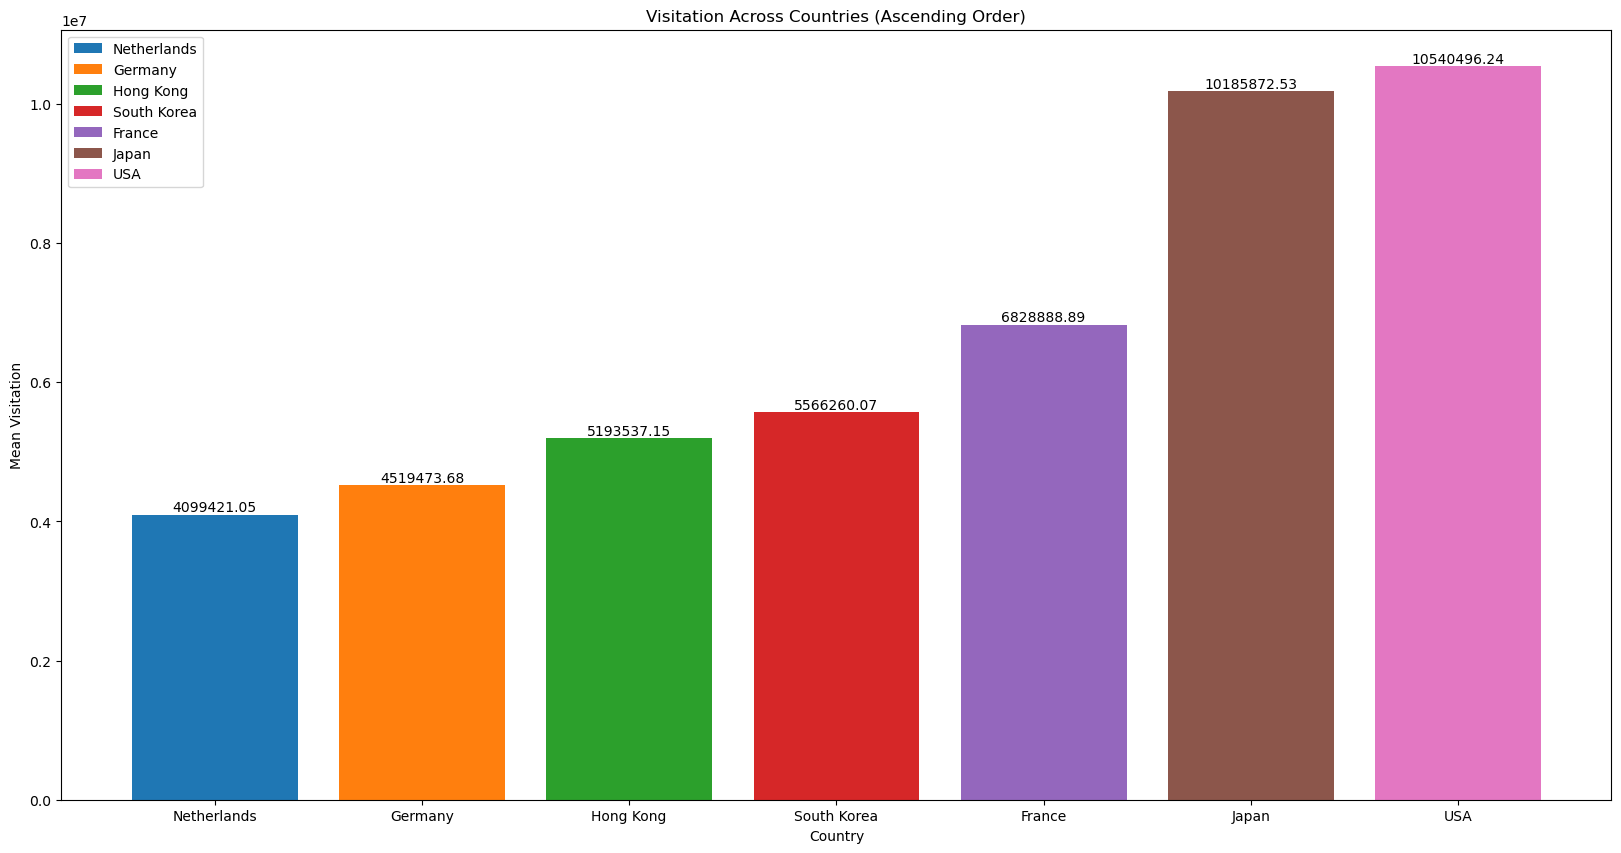

In [5]:
# add numbers on bargraphs 


mean_visitation_by_country = df.groupby('Country')['Visitation'].mean()

# Sort countries in ascending order based on mean visitation
sorted_countries = mean_visitation_by_country.sort_values().index

plt.figure(figsize=(20, 10))
for country in sorted_countries:
    plt.bar(country, mean_visitation_by_country[country], label=country)
    plt.text(country, mean_visitation_by_country[country], f'{mean_visitation_by_country[country]:.2f}', ha='center', va='bottom')

plt.title('Visitation Across Countries (Ascending Order)')
plt.xlabel('Country')
plt.ylabel('Mean Visitation')
plt.legend()
plt.show()

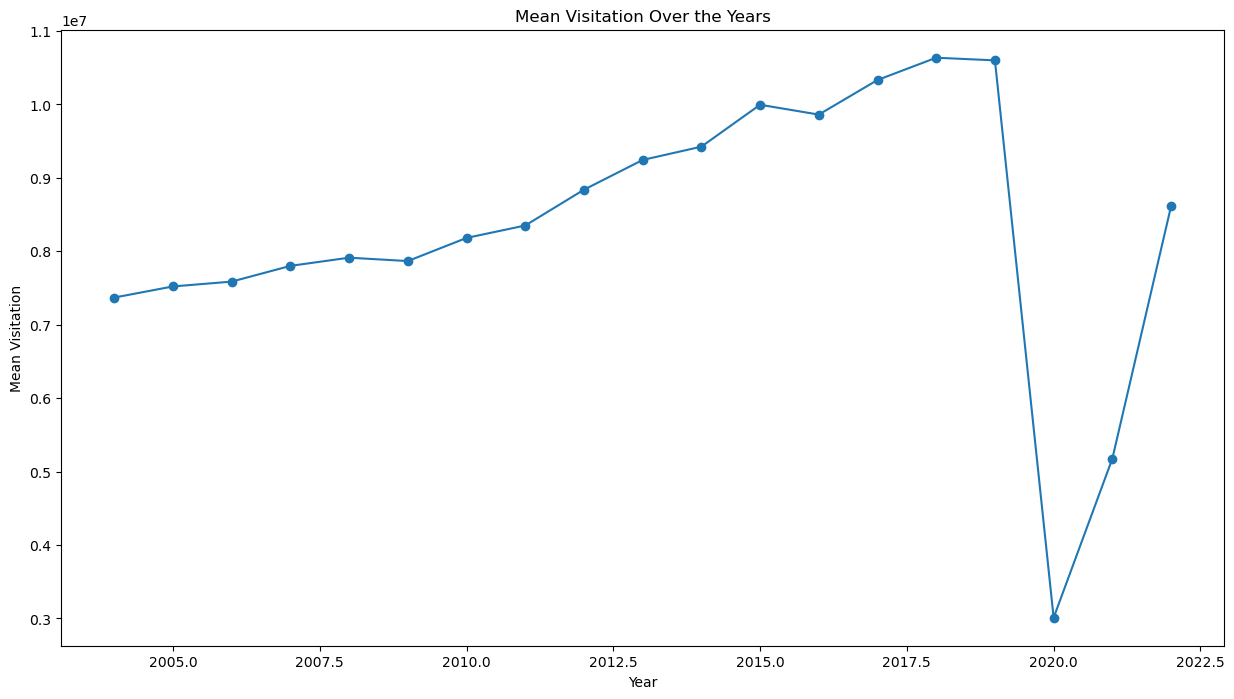

In [12]:
plt.figure(figsize=(15, 8))
df.groupby('Year')['Visitation'].mean().plot(marker='o')
plt.title('Mean Visitation Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Visitation')
plt.show()

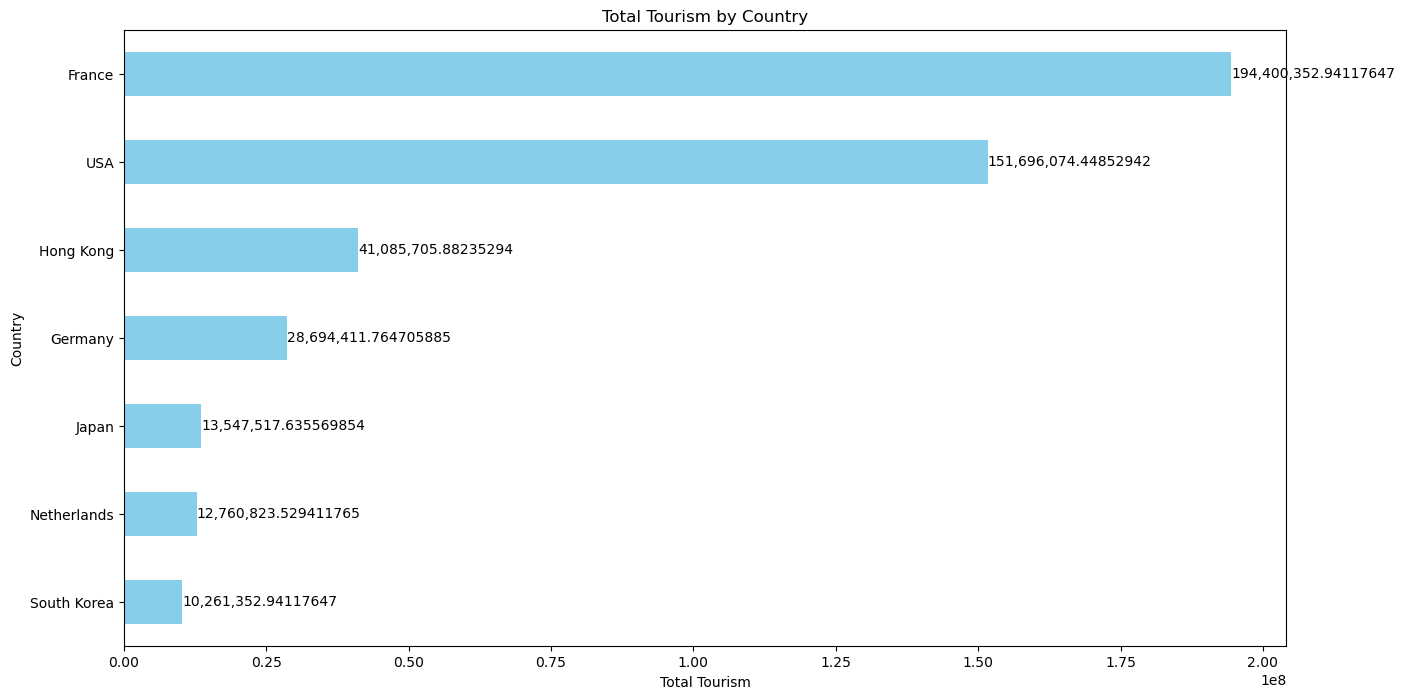

In [14]:
# MAKE IT HORIZONTAL
plt.figure(figsize=(15, 8))
tourism_by_country = df.groupby('Country')['Tourism'].mean().sort_values(ascending=True)
tourism_by_country.plot(kind='barh', color='skyblue')

for index, value in enumerate(tourism_by_country):
    plt.text(value, index, f'{value:,}', va='center', fontsize=10)

plt.title('Total Tourism by Country')
plt.xlabel('Total Tourism')
plt.ylabel('Country')
plt.show()

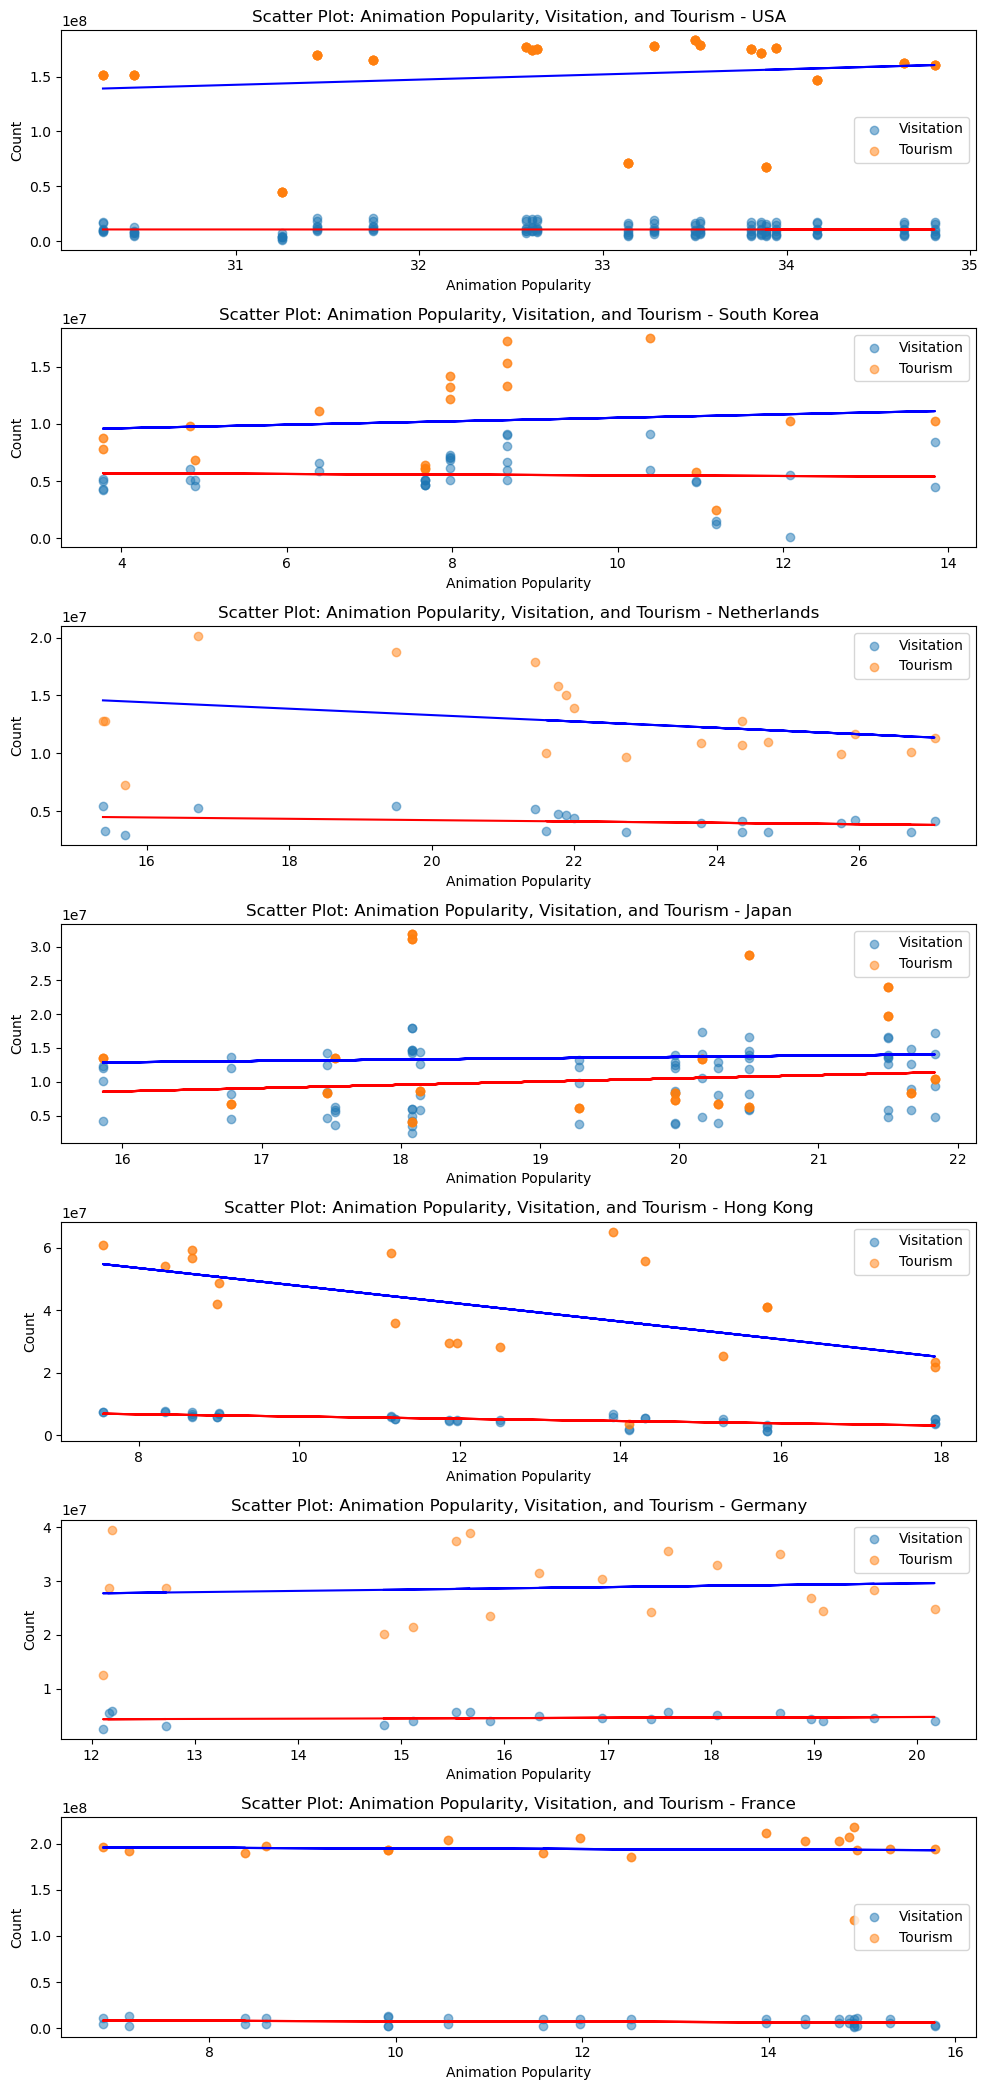

In [15]:
# Get the list of unique countries
countries = df['Country'].unique()

# Create subplots for each country
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(10, 3 * len(countries)))

# Iterate over countries and create scatter plots with trend lines
for i, country in enumerate(countries):
    country_data = df[df['Country'] == country]
    
    # Scatter Plot: Animation Popularity vs. Visitation
    axes[i].scatter(x='AnimationPopularity', y='Visitation', data=country_data, alpha=0.5, label='Visitation')
    
    # Trend line for Animation Popularity vs. Visitation
    z_visitation = np.polyfit(country_data['AnimationPopularity'], country_data['Visitation'], 1)
    p_visitation = np.poly1d(z_visitation)
    axes[i].plot(country_data['AnimationPopularity'], p_visitation(country_data['AnimationPopularity']), color='red')

    # Scatter Plot: Animation Popularity vs. Tourism
    axes[i].scatter(x='AnimationPopularity', y='Tourism', data=country_data, alpha=0.5, label='Tourism')
    
    # Trend line for Animation Popularity vs. Tourism
    z_tourism = np.polyfit(country_data['AnimationPopularity'], country_data['Tourism'], 1)
    p_tourism = np.poly1d(z_tourism)
    axes[i].plot(country_data['AnimationPopularity'], p_tourism(country_data['AnimationPopularity']), color='blue')

    axes[i].set_title(f'Scatter Plot: Animation Popularity, Visitation, and Tourism - {country}')
    axes[i].set_xlabel('Animation Popularity')
    axes[i].set_ylabel('Count')
    axes[i].legend()

plt.tight_layout()
plt.show()


3. Regression

In [16]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set the DataFrame index using the panel variables and sort it
df.set_index(['Park', 'Year'], inplace=True)
df.sort_index(inplace=True)

# Create a PanelOLS model
model = PanelOLS.from_formula('Visitation ~ AnimationPopularity + Tourism + GDP + Population', data=df)

# Fit the model
result = model.fit()

# Print regression results
print(result)


                          PanelOLS Estimation Summary                           
Dep. Variable:             Visitation   R-squared:                        0.0547
Estimator:                   PanelOLS   R-squared (Between):              0.1405
No. Observations:                 361   R-squared (Within):              -0.2106
Date:                Sat, Mar 30 2024   R-squared (Overall):              0.0547
Time:                        16:00:21   Log-likelihood                   -6035.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      6.8826
Entities:                          19   P-value                           0.0002
Avg Obs:                       19.000   Distribution:                   F(3,357)
Min Obs:                       19.000                                           
Max Obs:                       19.000   F-statistic (robust):             4.8691
                            

4. Diagnostics Checks and Adjusting the Model 

In [17]:
df = pd.read_excel('/Users/davidsokurov/Desktop/I.S./Data Analysis/Final I.S. Dataset.xlsx')
df.set_index(["Park", "Year"], inplace=True)


df['Visitation'] = df.groupby('Park')['Visitation'].transform(lambda x: x.fillna(x.mean()))
df['Tourism'] = df.groupby('Park')['Tourism'].transform(lambda x: x.fillna(x.mean()))

In [18]:
years = df.index.get_level_values("Year").to_list()
df["Year"] = pd.Categorical(years)

In [20]:
correlation_matrix = df[["AnimationPopularity", "Tourism", "GDP", "Population"]].corr()
print(correlation_matrix)


                     AnimationPopularity   Tourism       GDP  Population
AnimationPopularity             1.000000  0.496776  0.864348    0.907741
Tourism                         0.496776  1.000000  0.599833    0.590237
GDP                             0.864348  0.599833  1.000000    0.968551
Population                      0.907741  0.590237  0.968551    1.000000


In [22]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm
exog = sm.tools.tools.add_constant(df["AnimationPopularity"])

endog = df["Visitation"]
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

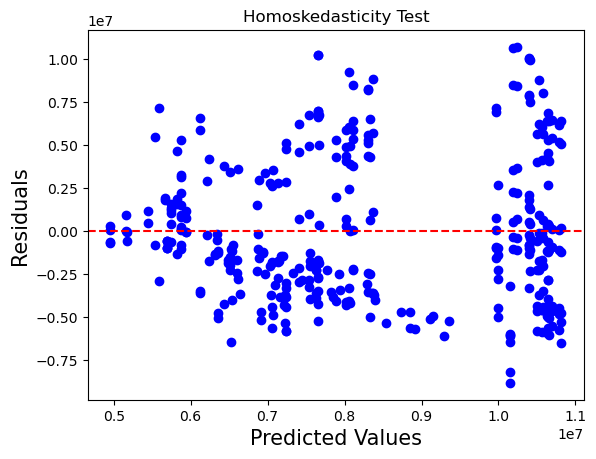

In [23]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = "blue")
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Residuals", fontsize = 15)
ax.set_title("Homoskedasticity Test", fontsize = 12)
plt.show()

In [24]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

# Assuming you have residuals_pooled_OLS from your previous code
pooled_OLS_dataset = pd.concat([df, residuals_pooled_OLS.rename("residuals")], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(["Year"], axis=1).fillna(0)
exog = sm.tools.tools.add_constant(df["AnimationPopularity"]).fillna(0)
white_test_results = het_white(pooled_OLS_dataset["residuals"], exog)
labels = ["LM-Stat", "LM p-val", "F-Stat", "F p-val"] 
print(dict(zip(labels, white_test_results)))

# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset["residuals"], exog)
labels = ["LM-Stat", "LM p-val", "F-Stat", "F p-val"] 
print(dict(zip(labels, breusch_pagan_test_results)))


{'LM-Stat': 34.991710772519376, 'LM p-val': 2.5214278739225677e-08, 'F-Stat': 19.21275143991949, 'F p-val': 1.1861453597997972e-08}
{'LM-Stat': 25.34038880235893, 'LM p-val': 4.805407552463173e-07, 'F-Stat': 27.102455215233793, 'F p-val': 3.255283000339051e-07}


In summary, the statistical tests indicate that the assumption of homoskedasticity is likely violated, and there is evidence to support the presence of heteroskedasticity in the residuals.

In [25]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset["residuals"]) 
print(durbin_watson_test_results)

0.4085650375729621


Durbin-Watson statistic of 0.41 is significantly less than 2, indicating positive autocorrelation in the residuals. This suggests that there may be a pattern in the residuals that is not explained by the model, and there might be some temporal dependence between consecutive observations.

As a consequence, assumption 3b is also violated, so it seems that a FE-/RE-model will be more suitable.

In [26]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

# Assuming df contains 'AnimationPopularity', 'Tourism', 'GDP', 'Population', and 'Visitation'
exog_vars = ['AnimationPopularity', 'Tourism', 'Population']
exog = sm.tools.tools.add_constant(df[exog_vars])
endog = df['Visitation']

# Random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
re_res = model_re.fit() 

# Fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects=True) 
fe_res = model_fe.fit() 

# Print results
print(re_res)


                        RandomEffects Estimation Summary                        
Dep. Variable:             Visitation   R-squared:                        0.2600
Estimator:              RandomEffects   R-squared (Between):             -0.1824
No. Observations:                 361   R-squared (Within):               0.2800
Date:                Sat, Mar 30 2024   R-squared (Overall):             -0.0693
Time:                        16:20:36   Log-likelihood                   -5744.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      41.808
Entities:                          19   P-value                           0.0000
Avg Obs:                       19.000   Distribution:                   F(3,357)
Min Obs:                       19.000                                           
Max Obs:                       19.000   F-statistic (robust):             41.808
                            

In [28]:
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             Visitation   R-squared:                        0.2815
Estimator:                   PanelOLS   R-squared (Between):             -0.2548
No. Observations:                 361   R-squared (Within):               0.2815
Date:                Sat, Mar 30 2024   R-squared (Overall):             -0.1237
Time:                        16:20:37   Log-likelihood                   -5731.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      44.280
Entities:                          19   P-value                           0.0000
Avg Obs:                       19.000   Distribution:                   F(3,339)
Min Obs:                       19.000                                           
Max Obs:                       19.000   F-statistic (robust):             44.280
                            

In [29]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from scipy import stats

# Log transformation of the dependent variable
df['Log_Visitation'] = np.log(df['Visitation'])

# Define independent and dependent variables
X = df[['AnimationPopularity', 'Tourism', 'GDPPerCapita',]]
y = df['Log_Visitation']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Test for multicollinearity
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

print("\nVariance Inflation Factor (VIF):")
print(calculate_vif(X))

# Test for homoskedasticity
_, p_homoskedasticity, _, _ = het_breuschpagan(model.resid, X)
print("\nHomoskedasticity Test (Breusch-Pagan):")
print("p-value:", p_homoskedasticity)

# Test for normality of residuals
p_normality = stats.normaltest(model.resid)[1]
print("\nNormality Test (Jarque-Bera):")
print("p-value:", p_normality)

                            OLS Regression Results                            
Dep. Variable:         Log_Visitation   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     22.17
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           3.45e-13
Time:                        16:36:30   Log-Likelihood:                -307.91
No. Observations:                 361   AIC:                             623.8
Df Residuals:                     357   BIC:                             639.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3715    

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from scipy import stats

# Log transformation of the dependent variable
df['Log_Visitation'] = np.log(df['Visitation'])

# Log transformation of independent variables
df['Log_Tourism'] = np.log(df['Tourism'])
df['Log_GDPPerCapita'] = np.log(df['GDPPerCapita'])

# Define independent and dependent variables
X = df[['AnimationPopularity', 'Log_Tourism', 'Log_GDPPerCapita']]
y = df['Log_Visitation']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Test for multicollinearity
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

print("\nVariance Inflation Factor (VIF):")
print(calculate_vif(X))

# Test for homoskedasticity
_, p_homoskedasticity, _, _ = het_breuschpagan(model.resid, X)
print("\nHomoskedasticity Test (Breusch-Pagan):")
print("p-value:", p_homoskedasticity)

# Test for normality of residuals
p_normality = stats.normaltest(model.resid)[1]
print("\nNormality Test (Jarque-Bera):")
print("p-value:", p_normality)

                            OLS Regression Results                            
Dep. Variable:         Log_Visitation   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     21.96
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           4.49e-13
Time:                        17:24:21   Log-Likelihood:                -308.18
No. Observations:                 361   AIC:                             624.4
Df Residuals:                     357   BIC:                             639.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  16.2131    